In [7]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from six import StringIO
import pydotplus
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [31]:
df = pd.read_csv('diabetes.csv')

In [32]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [35]:
# dt = DecisionTreeClassifier(max_depth=5)
# dt.fit(x_train, y_train)

# dt = DecisionTreeClassifier(max_features=5, max_depth=5)
# dt.fit(x_train, y_train)

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [36]:
y_pred = dt.predict(x_test)

In [37]:
accuracy_score(y_test, y_pred)

0.6558441558441559

In [40]:
path = dt.cost_complexity_pruning_path(x_train, y_train)

In [41]:
alphas = path['ccp_alphas']

In [52]:
alphas[:20]

array([0.        , 0.00107785, 0.0014477 , 0.0014477 , 0.0014658 ,
       0.00155463, 0.0015608 , 0.00159473, 0.001595  , 0.00171737,
       0.00203583, 0.00208639, 0.00217155, 0.00217155, 0.00217155,
       0.00217155, 0.00217155, 0.00217155, 0.00217155, 0.0022441 ])

In [42]:
train_acc = []
test_acc = []

for i in range(len(alphas)):
    dt = DecisionTreeClassifier(criterion='entropy',ccp_alpha=alphas[i])
    dt.fit(x_train, y_train)
    y_pred_train = dt.predict(x_train)
    y_pred_test = dt.predict(x_test)
    
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))

In [43]:
import matplotlib.pyplot as plt

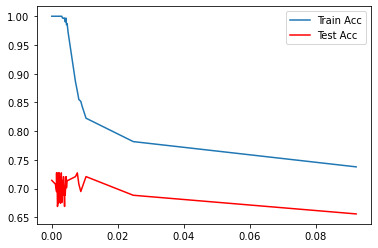

In [44]:
plt.plot(alphas, train_acc, label='Train Acc')
plt.plot(alphas, test_acc, 'r', label='Test Acc')
plt.legend()
plt.show()

In [50]:
train_acc[50:60]

[0.9853420195439739,
 0.9869706840390879,
 0.9723127035830619,
 0.8859934853420195,
 0.8697068403908795,
 0.8550488599348535,
 0.8517915309446255,
 0.8436482084690554,
 0.8224755700325733,
 0.7817589576547231]

In [51]:
test_acc[50:60]

[0.7012987012987013,
 0.7142857142857143,
 0.7142857142857143,
 0.7207792207792207,
 0.7272727272727273,
 0.7077922077922078,
 0.6948051948051948,
 0.7012987012987013,
 0.7207792207792207,
 0.6883116883116883]

In [38]:
# dot = StringIO()
# features = list(df.columns[:-1])
# tree.export_graphviz(dt, out_file=dot, feature_names=features)
# graph = pydotplus.graph_from_dot_data(dot.getvalue())

# graph.write_png('tree_1.png')